In [1]:
'''Introduction:
     Source Data from: https://www.kaggle.com/wendykan/lending-club-loan-data/data
    
     The goal of this script is to develop a model to estimate the probability of charge off given a loans origination
     characteristics. Only information available at origination will be used. Given that the portfolio is a mix of 
     current, paid off, charged off, and delinquent loans; all loans that are current will assume to stay current for the 
     life of the loan and all loans that are delinquent will be assumed to result in a charge-off.
'''

'Introduction:\n     Source Data from: https://www.kaggle.com/wendykan/lending-club-loan-data/data\n    \n     The goal of this script is to develop a model to estimate the probability of charge off given a loans origination\n     characteristics. Only information available at origination will be used. Given that the portfolio is a mix of \n     current, paid off, charged off, and delinquent loans; all loans that are current will assume to stay current for the \n     life of the loan and all loans that are delinquent will be assumed to result in a charge-off.\n'

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Set Column Width to View all Columns in the Dataset
pd.set_option('display.max_columns', 500)

In [3]:
#Load user defined functions
def get_metrics(true_labels, predicted_labels):
    '''Simple Function that prints the select functions
        Paramters:
        - true_labels: the 'true' or actual labels
        - predicted_labels: the predicted labels
    '''
    
    print('Accuracy:' + str(np.round(metrics.accuracy_score(true_labels, 
                                               predicted_labels),2)))
    
    print('Precision:' + str(np.round(metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),2)))
    
    print('Recall:' + str(np.round(metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),2)))
    
    print('F1 Score:' + str(np.round(metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),2)))
    print()
                        
def train_predict_evaluate_model(classifier, 
                                 train_features, train_labels, 
                                 test_features, test_labels):
    '''
    Function to estimate a classifier and print out the model fit metrics
    Paramters:
        - classifier: a sklearn algorithm object
        - train_features: the estimation features
        - train_labels: the estimation labels
        - test_features: the testing features
        - test_labels: the testing labels
    '''
    # build model    
    classifier.fit(train_features, train_labels)
    
    # predict using model
    predictions_insample = classifier.predict(train_features) 
    predictions = classifier.predict(test_features) 
    
    # evaluate model prediction performance   
    print("In of Sample Metrics")
    get_metrics(true_labels=train_labels, predicted_labels=predictions_insample)
    
    print("Out of Sample Metrics")
    get_metrics(true_labels=test_labels, predicted_labels=predictions)
    return predictions

In [4]:
#Load Dataset
dta = pd.read_csv("C:/Personal/Kaggle/lending-club-loan-data/loan.csv",dtype=object)

In [5]:
#Print  Column Names
print('Column Names are:')
print(dta.columns)

#Print Dataset Shape
print()
print("Shape is: " + str(dta.shape))

#View top five records
print()
print("Data frame head is: ")
print(dta.head())

Column Names are:
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_s

In [6]:
#Calculate the percent of records with missing for each column
null_rate = dta.isnull().sum()/len(dta) 
print(null_rate)
print() 

#Create a list of columns to keep with no more than 25% missing variables
null_index = list(null_rate[null_rate < .75].index) 
print(null_index)
print()

#Remove  columns that are not needed or going to be used given that they are related to post origination performance
null_index.remove('id')
null_index.remove('member_id')
null_index.remove('emp_title')
null_index.remove('url')
null_index.remove('title')
null_index.remove('pymnt_plan')
null_index.remove('zip_code')
null_index.remove('initial_list_status')
null_index.remove('out_prncp') 
null_index.remove('out_prncp_inv')
null_index.remove('total_pymnt')
null_index.remove('total_rec_int')
null_index.remove('total_rec_prncp')
null_index.remove('total_pymnt_inv')
null_index.remove('total_rec_late_fee')
null_index.remove('recoveries')
null_index.remove('collection_recovery_fee')
null_index.remove('last_pymnt_d')
null_index.remove('last_pymnt_amnt')
null_index.remove('next_pymnt_d')
null_index.remove('last_credit_pull_d')
null_index.remove('mths_since_last_delinq')
null_index.remove('issue_d') 
null_index.remove('earliest_cr_line') 
null_index.remove('policy_code') 
null_index.remove('sub_grade') 
null_index.remove('application_type') 
null_index.remove('int_rate') 
null_index.remove('installment') 

#Subset the data to keep only selected columns
dta = dta[null_index]

#Print column names
print(dta.columns)
print()

#Print data head
print(dta.head())
print()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.057988
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000005
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                           0.857976
purpose                        0.000000
title                          0.000170
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [7]:
#Clean Data - Remove Rows with Missing Data

#For each column, print the percent of records with NAs
print(dta.isnull().sum()/len(dta))

#Remove Records with  NA's
print('shape origin - with NAs: ' + str(dta.shape))
dta.dropna(axis=0, how='any', inplace=True)
print('shape clean - without NAs: ' + str(dta.shape))

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
grade                         0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000005
verification_status           0.000000
loan_status                   0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000033
inq_last_6mths                0.000033
open_acc                      0.000033
pub_rec                       0.000033
revol_bal                     0.000000
revol_util                    0.000566
total_acc                     0.000033
collections_12_mths_ex_med    0.000163
acc_now_delinq                0.000033
tot_coll_amt                  0.079195
tot_cur_bal                   0.079195
total_rev_hi_lim              0.079195
dtype: float64
shape orig

In [8]:
#Print Lists of Character Categories
print(dta.term.value_counts()) #Need to Create Dummy Variables For Modeling, '36 months' is reference class
print(dta.grade.value_counts(())) #Need to Create Dummy Variables For Modeling, 'A' is reference class
print(dta.emp_length.value_counts(())) #Recode NA and <1 year to 0; '0' is reference class
print(dta.home_ownership.value_counts(())) #Remove Other/None/Any and set as NA; 'mortgage' is reference class
print(dta.verification_status.value_counts(())) #"Source Verified" is reference class
print(dta.purpose.value_counts(())) #Recode to other if count is < 10,000. "debt_consolidation" is refernece class
print(dta.addr_state.value_counts(())) #"CA" is reference class

print(dta.loan_status.value_counts(())) #Dependent Variable, reclassify so it is only pay off 
        #and charge off and then encode so charge off = 1 and pay off = 0
      

 36 months    566768
 60 months    249954
Name: term, dtype: int64
B    232674
C    231207
A    131428
D    129860
E     65646
F     21085
G      4822
Name: grade, dtype: int64
10+ years    274533
2 years       71501
3 years       63580
< 1 year      63158
1 year        51537
5 years       49760
4 years       46663
n/a           42754
7 years       41178
8 years       41165
6 years       38592
9 years       32301
Name: emp_length, dtype: int64
MORTGAGE    412127
RENT        322515
OWN          81990
OTHER           45
NONE            42
ANY              3
Name: home_ownership, dtype: int64
Source Verified    311572
Verified           267370
Not Verified       237780
Name: verification_status, dtype: int64
debt_consolidation    489017
credit_card           195486
home_improvement       46896
other                  36660
major_purchase         14126
small_business          7445
medical                 7445
car                     6661
moving                  4547
vacation                

In [9]:
#Record Values in Columns to Standardise and reduce the number of levels as needed
##### emp_length #####
mask = dta.emp_length.isin(['n/a'])
column_name = 'emp_length'
dta.loc[mask, column_name] = '< 1 year'
print(dta.emp_length.value_counts(()))
print()

##### home_ownership #####
mask = dta.home_ownership.isin(['OTHER','NONE','ANY'])
column_name = 'home_ownership'
dta.loc[mask, column_name] = 'OTHER'
print(dta.home_ownership.value_counts(()))
print()

##### purpose #####
counts = dta.purpose.value_counts()
counts = list(counts.loc[counts < 10000].index.values)
mask = dta.purpose.isin(counts)
column_name = 'purpose'
dta.loc[mask, column_name] = "other"
print(dta.purpose.value_counts(()))
print()

##### loan_status #####
chargeoff = ['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default']
mask = dta.loan_status.isin(chargeoff)
column_name = 'loan_status'
dta.loc[mask, column_name] = "Default"
dta.loc[~mask, column_name] = "PayOff"

column_name = 'y'
dta.loc[mask, column_name] = 1
dta.loc[~mask, column_name] = 0
print(dta.y.value_counts(()))
print()

##### Grade #####
labeler = LabelEncoder()
labeler = labeler.fit(dta.grade)

y2 = labeler.transform(dta.grade)
y2 = pd.DataFrame(y2, columns=['y2'])
dta = dta.reset_index()
dta = pd.concat([dta, y2], axis=1)

print(dta.grade.value_counts(()))
print()

10+ years    274533
< 1 year     105912
2 years       71501
3 years       63580
1 year        51537
5 years       49760
4 years       46663
7 years       41178
8 years       41165
6 years       38592
9 years       32301
Name: emp_length, dtype: int64

MORTGAGE    412127
RENT        322515
OWN          81990
OTHER           90
Name: home_ownership, dtype: int64

debt_consolidation    489017
credit_card           195486
other                  71197
home_improvement       46896
major_purchase         14126
Name: purpose, dtype: int64

0.0    760341
1.0     56381
Name: y, dtype: int64

B    232674
C    231207
A    131428
D    129860
E     65646
F     21085
G      4822
Name: grade, dtype: int64



In [10]:
#Cast Columns to Correct Numeric Formats and Encodings; Strings can remain as objects
#Print Data Types
print(dta.dtypes)

#Print Head
print(dta.head(2))

#To Numeric
dta.loan_amnt = pd.to_numeric(dta.loan_amnt)
dta.funded_amnt = pd.to_numeric(dta.funded_amnt)
dta.funded_amnt_inv = pd.to_numeric(dta.funded_amnt_inv)
dta.annual_inc = pd.to_numeric(dta.annual_inc)
dta.dti = pd.to_numeric(dta.dti)
dta.delinq_2yrs = pd.to_numeric(dta.delinq_2yrs)
dta.inq_last_6mths = pd.to_numeric(dta.inq_last_6mths)
dta.open_acc = pd.to_numeric(dta.open_acc)
dta.pub_rec = pd.to_numeric(dta.pub_rec)
dta.revol_util = pd.to_numeric(dta.revol_util)
dta.revol_bal = pd.to_numeric(dta.revol_bal)
dta.total_acc = pd.to_numeric(dta.total_acc)
dta.collections_12_mths_ex_med = pd.to_numeric(dta.collections_12_mths_ex_med)
dta.acc_now_delinq = pd.to_numeric(dta.acc_now_delinq)
dta.tot_coll_amt = pd.to_numeric(dta.tot_coll_amt)
dta.tot_cur_bal = pd.to_numeric(dta.tot_cur_bal)
dta.total_rev_hi_lim = pd.to_numeric(dta.total_rev_hi_lim)

index                           int64
loan_amnt                      object
funded_amnt                    object
funded_amnt_inv                object
term                           object
grade                          object
emp_length                     object
home_ownership                 object
annual_inc                     object
verification_status            object
loan_status                    object
purpose                        object
addr_state                     object
dti                            object
delinq_2yrs                    object
inq_last_6mths                 object
open_acc                       object
pub_rec                        object
revol_bal                      object
revol_util                     object
total_acc                      object
collections_12_mths_ex_med     object
acc_now_delinq                 object
tot_coll_amt                   object
tot_cur_bal                    object
total_rev_hi_lim               object
y           

In [11]:
#Bivariate Exporation
#loan_status by ach potential explanatory variable
print('Mean acc_now_delinq by loan_status')
print(dta.groupby('loan_status').acc_now_delinq.mean())
print()

print('Mean annual_inc by loan_status')
print(dta.groupby('loan_status').annual_inc.mean())
print()

print('Mean collections_12_mths_ex_med by loan_status')
print(dta.groupby('loan_status').collections_12_mths_ex_med.mean())
print()

print('Mean delinq_2yrs by loan_status')
print(dta.groupby('loan_status').delinq_2yrs.mean())
print()

print('Mean dti by loan_status')
print(dta.groupby('loan_status').dti.mean())
print()

print('Mean funded_amnt by loan_status')
print(dta.groupby('loan_status').funded_amnt.mean())
print()

print('Mean funded_amnt_inv by loan_status')
print(dta.groupby('loan_status').funded_amnt_inv.mean())
print()

print('Mean loan_amnt by loan_status')
print(dta.groupby('loan_status').loan_amnt.mean())
print()

print('Mean inq_last_6mths by loan_status')
print(dta.groupby('loan_status').inq_last_6mths.mean())
print()

print('Mean open_acc by loan_status')
print(dta.groupby('loan_status').open_acc.mean())
print()

print('Mean pub_rec by loan_status')
print(dta.groupby('loan_status').pub_rec.mean())
print()

print('Mean revol_bal by loan_status')
print(dta.groupby('loan_status').revol_bal.mean())
print()

print('Mean revol_util by loan_status')
print(dta.groupby('loan_status').revol_util.mean())
print()

print('Mean tot_coll_amt by loan_status')
print(dta.groupby('loan_status').tot_coll_amt.mean())
print()

print('Mean tot_cur_bal by loan_status')
print(dta.groupby('loan_status').tot_cur_bal.mean())
print()

print('Mean total_acc by loan_status')
print(dta.groupby('loan_status').total_acc.mean())
print()

print('Mean total_rev_hi_lim by loan_status')
print(dta.groupby('loan_status').total_rev_hi_lim.mean())
print()

print('Term by loan_status')
print(dta.groupby(['term']).loan_status.value_counts(normalize=True))
print()

print('verification_status by loan_status')
print(dta.groupby(['verification_status']).loan_status.value_counts(normalize=True))
print()

print('addr_state by loan_status')
print(dta.groupby(['addr_state']).loan_status.value_counts(normalize=True))
print()

print('emp_length by loan_status')
print(dta.groupby(['emp_length']).loan_status.value_counts(normalize=True))
print()

print('home_ownership by loan_status')
print(dta.groupby(['home_ownership']).loan_status.value_counts(normalize=True))
print()

print('purpose by loan_status')
print(dta.groupby(['purpose']).loan_status.value_counts(normalize=True))
print()

print('grade by loan_status')
print(dta.groupby(['grade']).loan_status.value_counts(normalize=True))
print()



Mean acc_now_delinq by loan_status
loan_status
Default    0.005959
PayOff     0.005374
Name: acc_now_delinq, dtype: float64

Mean annual_inc by loan_status
loan_status
Default    68142.120985
PayOff     76093.839263
Name: annual_inc, dtype: float64

Mean collections_12_mths_ex_med by loan_status
loan_status
Default    0.013356
PayOff     0.015785
Name: collections_12_mths_ex_med, dtype: float64

Mean delinq_2yrs by loan_status
loan_status
Default    0.351519
PayOff     0.326500
Name: delinq_2yrs, dtype: float64

Mean dti by loan_status
loan_status
Default    19.444441
PayOff     18.415527
Name: dti, dtype: float64

Mean funded_amnt by loan_status
loan_status
Default    15242.979461
PayOff     14980.381368
Name: funded_amnt, dtype: float64

Mean funded_amnt_inv by loan_status
loan_status
Default    15236.752833
PayOff     14974.059073
Name: funded_amnt_inv, dtype: float64

Mean loan_amnt by loan_status
loan_status
Default    15243.147514
PayOff     14980.388898
Name: loan_amnt, dtype: f

In [12]:
#Create Dummy Variables for Categorical Data
dta_dummied = pd.get_dummies(dta, 
                             drop_first=True, 
                             prefix=['term','emp_length','home_ownership','verification_status','purpose','addr_state'],
                             columns=['term','emp_length','home_ownership','verification_status','purpose','addr_state']                            )

#Remove Source Dependent Variables
dta_dummied.drop(['loan_status','grade'], axis=1, inplace=True)
print(dta_dummied.shape)
print()

#Remove any missing
print('Pre Cleaning Count: ' + str(dta_dummied.shape))
dta_dummied.dropna(axis=0, how='any', inplace=True)
print('Post Cleaning Count: ' + str(dta_dummied.shape))
print()

y = dta_dummied.y
y2 = dta_dummied.y2
print(y[:5])
print(y2[:5])

X = dta_dummied.drop(['y','y2'], axis=1)
print(X.columns)

(816722, 90)

Pre Cleaning Count: (816722, 90)
Post Cleaning Count: (816722, 90)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: y, dtype: float64
0    1
1    2
2    0
3    1
4    0
Name: y2, dtype: int64
Index(['index', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'term_ 60 months', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_debt_consolidation', 'purpose_home_improvement',
  

In [13]:
#Split Data in to Train and Test Sets - Target Var = Default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

#Print Shapes for Training data for Target Var Default
print('Shape of Default Data')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print()

#Split Data in to Train and Test Sets - Targe Var = Grade
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.10, random_state=42)

print('Shape of Grade Data')
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

Shape of Default Data
(735049, 88)
(81673, 88)
(735049,)
(81673,)

Shape of Grade Data
(735049, 88)
(81673, 88)
(735049,)
(81673,)


Dependent Variable - Loand Status (Default = 1)
In of Sample Metrics
Accuracy:0.63
Precision:0.9
Recall:0.63
F1 Score:0.72
Out of Sample Metrics
Accuracy:0.63
Precision:0.9
Recall:0.63
F1 Score:0.72
       0.0    1.0
0.0  47969  28085
1.0   1944   3675


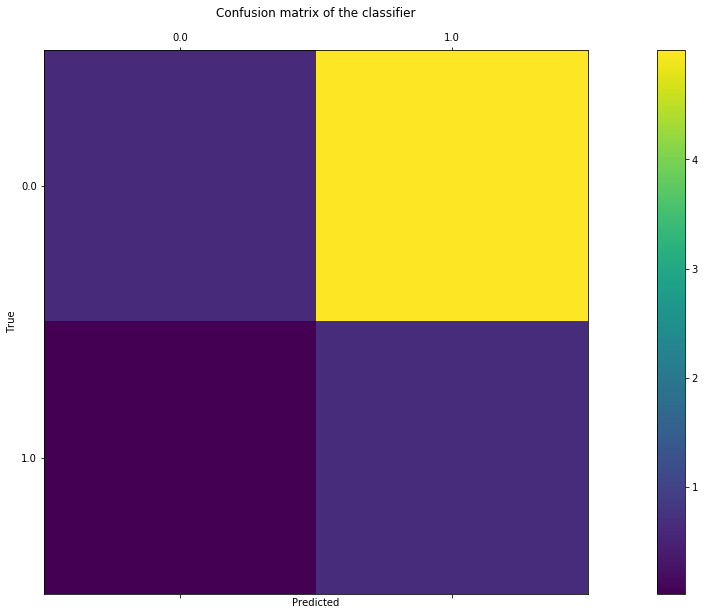

In [14]:
#Train model for Default Estimate
print('Dependent Variable - Loand Status (Default = 1)')
lgr_default = LogisticRegression(penalty='l2', C=1, class_weight='balanced')

lgr_default_pred = train_predict_evaluate_model(classifier=lgr_default,
                                           train_features=X_train,
                                           train_labels=y_train,
                                           test_features=X_test,
                                           test_labels=y_test)

y_predicted = lgr_default.predict(X_test)

labels = list(set(y_test))
cm = metrics.confusion_matrix(y_test, y_predicted, labels)
cm2 = pd.DataFrame(cm, index=labels, columns=labels)
print(cm2)
cm = cm / cm.astype(np.float).sum(axis=1)

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Dependent Variable - Grade, predicted probability of default
In of Sample Metrics
Accuracy:0.24


C:\Users\michael.loehlein\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision:0.24
Recall:0.24


C:\Users\michael.loehlein\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score:0.23
Out of Sample Metrics
Accuracy:0.25
Precision:0.24
Recall:0.25
F1 Score:0.23
     F  E     A     D     G     B     C
F   55  0   344   162   515   338   657
E  122  0  1341   459  1106  1240  2138
A   74  0  7161   441   251  2302  3027
D  276  0  2963  1007  1998  2383  4410
G    7  0    84    53   114    85   155
B  362  0  8285  1563  1797  4395  6891
C  406  0  6621  1533  2680  4559  7313


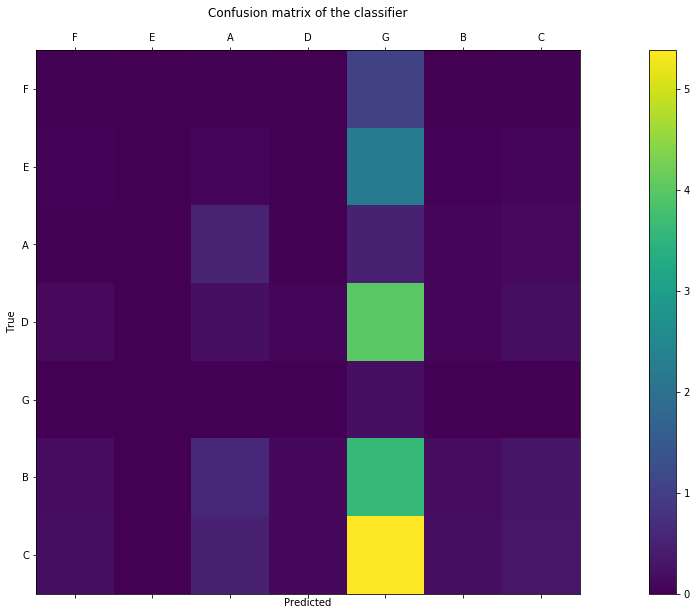

In [15]:
print('Dependent Variable - Grade, predicted probability of default')
lgr_grade = LogisticRegression(penalty='l2', C=1, class_weight='balanced')

x_trainp = lgr_default.predict_proba(X_train2)
x_testp = lgr_default.predict_proba(X_test2)

lgr_grade_pred = train_predict_evaluate_model(classifier=lgr_grade,
                                           train_features=x_trainp,
                                           train_labels=y_train2,
                                           test_features=x_testp,
                                           test_labels=y_test2)

y_predicted = lgr_grade.predict(x_testp)
train = labeler.inverse_transform(y_test2)
test = labeler.inverse_transform(y_predicted)

labels = list(set(train))
cm = metrics.confusion_matrix(train, test, labels)
cm2 = pd.DataFrame(cm, index=labels, columns=labels)
print(cm2)
cm = cm / cm.astype(np.float).sum(axis=1)

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Dependent Variable - Grade, full origination data
In of Sample Metrics
Accuracy:0.27
Precision:0.31
Recall:0.27
F1 Score:0.26
Out of Sample Metrics
Accuracy:0.27
Precision:0.31
Recall:0.27
F1 Score:0.27
      F     E     A    D     G     B     C
F   340   266   153   46   688   226   352
E   776  1012   610  128  1769   671  1440
A   347   662  7338   28   376  2382  2123
D  1431  1730  1575  316  2229  2220  3536
G    56    57    41   14   240    22    68
B  1609  1644  6421  217  1277  5793  6332
C  2156  2406  4008  394  2641  4596  6911


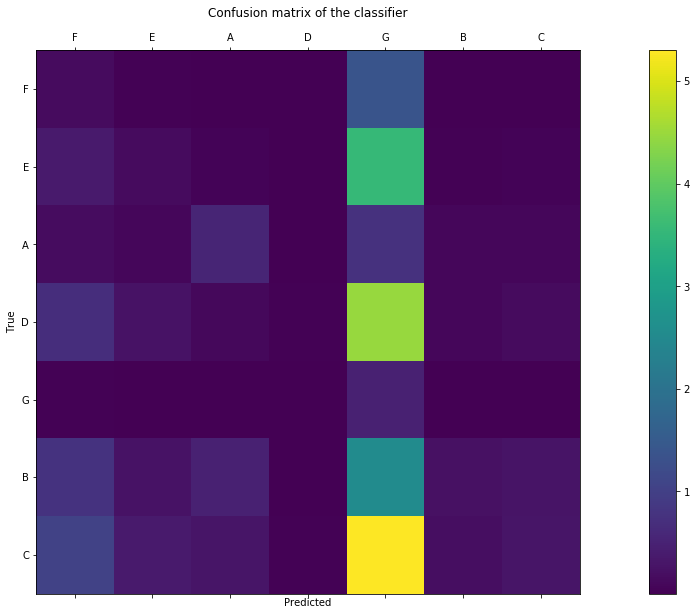

In [16]:
print('Dependent Variable - Grade, full origination data')
lgr_grade = LogisticRegression(penalty='l2', C=1, class_weight='balanced')

lgr_grade_pred = train_predict_evaluate_model(classifier=lgr_grade,
                                           train_features=X_train2,
                                           train_labels=y_train2,
                                           test_features=X_test2,
                                           test_labels=y_test2)

y_predicted = lgr_grade.predict(X_test2)
train = labeler.inverse_transform(y_test2)
test = labeler.inverse_transform(y_predicted)

import matplotlib.pyplot as plt

labels = list(set(train))
cm = metrics.confusion_matrix(train, test, labels)
cm2 = pd.DataFrame(cm, index=labels, columns=labels)
print(cm2)
cm = cm / cm.astype(np.float).sum(axis=1)

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In of Sample Metrics
Accuracy:0.78
Precision:0.79
Recall:0.78
F1 Score:0.77
Out of Sample Metrics
Accuracy:0.47
Precision:0.47
Recall:0.47
F1 Score:0.44


C:\Users\michael.loehlein\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\michael.loehlein\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


    F     E     A     D  G      B      C
F  68   572     1   531  0     56    843
E  26  1071    27  1668  0    415   3199
A   0     0  6786     7  0   5726    737
D  17   624   143  2550  0   2097   7606
G  20   185     0   143  0      5    145
B   1    34  2565   240  0  14150   6303
C   7   253   714  1335  0   7390  13413


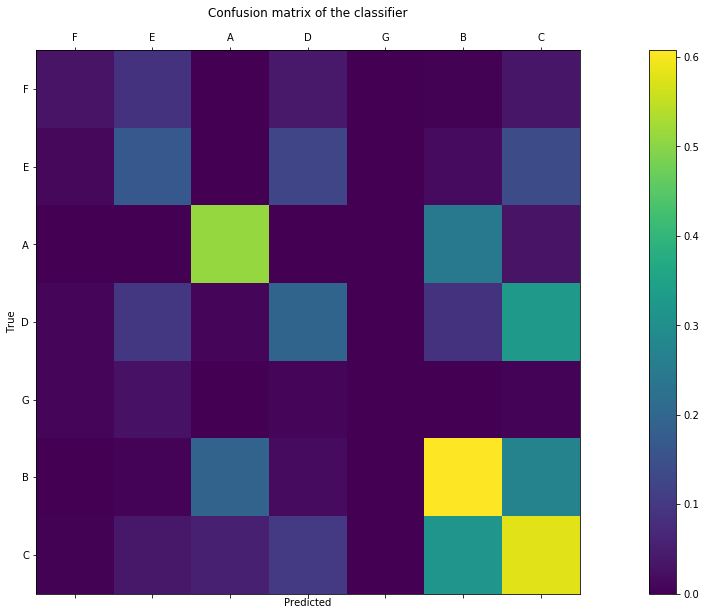

In [18]:
print('Random Forest - Grade, full origination data')

rf = RandomForestClassifier(oob_score=True, n_jobs=2, n_estimators=250, 
                                        max_features='sqrt', criterion='gini', max_depth=None, 
                                        min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=None)

rf_grade_pred = train_predict_evaluate_model(classifier=rf,
                                           train_features=X_train2,
                                           train_labels=y_train2,
                                           test_features=X_test2,
                                           test_labels=y_test2)

y_predicted = rf.predict(X_test2)
train = labeler.inverse_transform(y_test2)
test = labeler.inverse_transform(y_predicted)

labels = list(set(train))
cm = metrics.confusion_matrix(train, test, labels)
cm2 = pd.DataFrame(cm, index=labels, columns=labels)
print(cm2)
cm = cm / cm.astype(np.float).sum(axis=1)

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [19]:
print('Random Forest - Default, full origination data')

rf = RandomForestClassifier(oob_score=True, n_jobs=2, n_estimators=250, 
                                        max_features='sqrt', criterion='gini', max_depth=None, 
                                        min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=None)

rf_grade_pred = train_predict_evaluate_model(classifier=rf,
                                           train_features=X_train,
                                           train_labels=y_train,
                                           test_features=X_test,
                                           test_labels=y_test)

y_predicted = rf.predict(X_test2)

labels = list(set(y_test))
cm = metrics.confusion_matrix(y_test, y_predicted, labels)
cm2 = pd.DataFrame(cm, index=labels, columns=labels)
print(cm2)
cm = cm / cm.astype(np.float).sum(axis=1)

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random Forest - Default
In of Sample Metrics
Accuracy:0.93
Precision:0.94
Recall:0.93
F1 Score:0.9
Out of Sample Metrics
Accuracy:0.93
Precision:0.87
Recall:0.93
F1 Score:0.9


C:\Users\michael.loehlein\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\michael.loehlein\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


IndexError: arrays used as indices must be of integer (or boolean) type

In [17]:
'''
After removing all non-origination related information a logistic regression model is able to predict around 60% of paid in full vs 
charge-offs based only on origination data. While the overal rate is potentially acceptable, the model missed around 
25% of charge-offs and predicted a charge-off on a substantial amount of loans which are paid in full.

In terms of predicting the 'grade' of the borrower however, a logistic regression model was only able to predict 25% of the 'grades
of the loans. The initial model included interest rate and installement payment (whichare both a result of the grade) and
thus had a higher predictive power, however those variable were removed. Two models to predict the grade were evaluated: 1)
based on the full predcitor set and 2) based on the output from the charge-off model. They both performed about the same, with
a 1 in 4 accuracy.

The random forest model was able to predict grade better than a logistic regression model with about a 50% out of sample test. 
However the random forest model appears to over fit the data. For predicting default the random forest model failed to predict
any defaults and had 100% of the data predict to perform. Overal, I would not recommend a random forest model for the data as it
stands.
'''

"\nAfter removing all non-origination related information a logistic regression model is able to predict around 60% of paid in full vs \ncharge-offs based only on origination data. While the overal rate is potentially acceptable, the model missed around \n25% of charge-offs and predicted a charge-off on a substantial amount of loans which are paid in full.\n\nIn terms of predicting the 'grade' of the borrower however, a logistic regression model was only able to predict 25% of the 'grades\nof the loans. The initial model included interest rate and installement payment (whichare both a result of the grade) and\nthus had a higher predictive power, however those variable were removed. Two models to predict the grade were evaluated: 1)\nbased on the full predcitor set and 2) based on the output from the charge-off model. They both performed about the same, with\na 1 in 4 accuracy.\n"